In [1]:
import pandas as pd

df = pd.read_csv('../../data/preprocessed_train.csv')
df = df[['data', 'label']]

df.head()

,data,label
0,지금 너 스스로를 죽여달라고 애원하는 것인가 ? 아닙니다 . 죄송합니다 . 죽을 거...,0
1,길동경찰서입니다 . 시 분 마트에 폭발물을 설치할거다 . 네 ? 똑바로 들어 한번만...,0
2,너 되게 귀여운거 알지 ? 나보다 작은 남자는 첨봤어 . 그만해 . 니들 놀리는거 ...,3
3,어이 거기 예 ? ? 너 말이야 너 . 이리 오라고 무슨 일 . 너 옷 좋아보인다 ...,1
4,저기요 혹시 날이 너무 뜨겁잖아요 ? 저희 회사에서 이 선크림 파는데 한 번 손등에...,1


In [2]:
import tensorflow as tf
from transformers import AutoTokenizer, TFBertModel

tokenizer = AutoTokenizer.from_pretrained("klue/bert-base")
model = TFBertModel.from_pretrained("klue/bert-base", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the 

In [3]:
from tqdm.notebook import tqdm

def cls_embedding(data):
    for row in tqdm(data):
        inputs = tokenizer(row, return_tensors='tf', truncation=True)
        outputs = model(inputs)
        cls_embeddings = outputs.last_hidden_state[:,0]
        yield cls_embeddings 

In [5]:
import numpy as np

cls_emb = list(cls_embedding(df['data']))
emb_df = pd.DataFrame(np.squeeze(np.array(cls_emb), axis=1))

  0%|          | 0/3950 [00:00<?, ?it/s]

In [6]:
emb_df.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.359317,-0.702831,-0.573080,0.684754,0.872938,0.309491,-0.480664,-0.197872,1.640637,-0.002314,...,0.035559,0.188397,-0.267862,-0.499227,0.189266,-0.753793,-0.206783,0.224637,-0.893487,0.136315
1,0.252396,-0.500247,-0.235553,-0.096403,0.320728,0.121425,-0.928532,0.686953,1.755515,0.618956,...,0.075407,-0.232331,-0.185619,0.276091,0.643697,-0.530379,-0.048291,0.324600,-0.230801,-0.226705
2,0.742206,-0.325070,-0.157420,1.286074,1.075361,0.189326,0.218960,0.153680,0.876944,-0.116227,...,-0.435012,0.175070,-0.094890,-0.973075,0.185539,-1.071784,-0.784394,0.839996,0.064411,-0.031872
3,0.513824,-0.646715,-0.449980,-0.245871,0.474216,-0.110154,1.034201,0.531661,0.929768,-0.566891,...,-0.492184,-0.069331,0.035267,-0.494979,-0.401697,-0.071955,0.086595,0.449325,-0.680995,0.276713
4,0.882560,0.017074,-1.146711,0.265954,0.453349,-1.211668,-0.348621,-0.414122,1.348409,0.325772,...,0.549425,0.689190,-0.720665,-1.176891,-0.348082,-0.410114,0.127535,0.994096,-0.624409,0.247154


* 컬럼이 너무 많으니 줄임

In [8]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=200)
emb_svd = svd.fit_transform(emb_df)
df_emb = pd.DataFrame(emb_svd)

df_emb.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,20.743607,-6.085369,-2.644442,2.859847,-3.329304,3.328457,-1.018658,-3.758843,-0.032328,1.629879,...,0.212341,-0.203319,-0.230716,0.187051,0.237512,-0.200602,0.074037,-0.092697,0.278971,0.135284
1,20.319283,-3.053048,0.637317,-2.973000,1.513921,1.161007,0.489187,0.217987,1.583105,4.320551,...,-0.022096,0.157178,-0.671631,0.556816,0.411467,0.322049,-0.204467,-0.182691,0.207293,0.010073
2,21.953419,0.340931,-5.578548,0.103323,-1.033945,3.518614,-1.350706,-1.717717,1.532305,2.060272,...,0.253124,-0.356696,0.402839,-0.058973,-0.417798,0.137424,-0.305954,-0.289261,-0.439914,0.154316
3,20.451817,0.690478,1.791579,-2.802230,-2.145340,2.957685,4.864275,-2.046922,2.131988,-1.126349,...,-0.136617,0.278570,0.429543,-0.318817,-0.099637,-0.381455,-0.125119,0.131136,-0.244992,0.305333
4,20.218620,-0.158653,-6.636853,6.332942,3.713649,-1.226225,3.267135,2.087227,-1.836465,-3.193037,...,-0.248316,-0.283343,0.061829,0.276596,-0.248815,0.361993,-0.146948,0.526682,0.392534,0.517753


In [125]:
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, GlobalMaxPooling1D, Dropout, Conv1D
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

%config InlineBackend.figure_format = 'retina'
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager.findfont(font)

class ClassifierModel():
    def __init__(self):
        super(ClassifierModel, self).__init__()
        
        self.model = self.set_model()
        self.history = None
        self.es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
            
            
    def set_model(self):
        
        model = Sequential()
        
        model.add(Dense(128, input_shape=(None, 768)))
        
        model.add(Dense(128, activation='relu'))
#         model.add(Embedding(1, 128, input_shape=(None,)))
        
#         model.add(Conv1D(64, 3, activation='relu'))
#         model.add(Dropout(0.5))

#         forward_layer = LSTM(64, return_sequences=True)
#         backward_layer = LSTM(64, activation='relu', return_sequences=True, go_backwards=True)
        
#         model.add(Bidirectional(forward_layer,  backward_layer=backward_layer))

#         model.add(LSTM(64, return_sequences=True))
#         model.add(GlobalMaxPooling1D())
                
        model.add(Dense(4, activation='softmax'))
        
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
        return model
        
    
    def summary(self):
        return self.model.summary()
    
    
    def train(self, x, y, x_val, y_val):
        self.history = self.model.fit(
            x, y, epochs=20, batch_size=64,
            validation_data=(x_val, y_val), callbacks=self.es, verbose=1)
    
    def evaluate(self, x, y):
        return self.model.evaluate(x, y, verbose=2)
    
    
    def show_history(self):
        plt.plot(self.history.history['accuracy'])
        plt.plot(self.history.history['val_accuracy'])
        plt.title(f'accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()

        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title(f'loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
        
    
    def show_report(self, x, y):
        y_pred = self.model.predict(x).argmax(axis=1)
        y_true = y.argmax(axis=1)
                
        conf_matrix = confusion_matrix(y_true, y_pred)
        names = ["협박", "갈취", "직장내 괴롭힘", "기타 괴롭힘"]
        conf_matrix = pd.DataFrame(conf_matrix, index=names, columns=names)
        sns.heatmap(conf_matrix, annot=True, fmt="d")
        plt.title("Confusion Matrix")
        plt.show()

In [121]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

Y = tf.keras.utils.to_categorical(df['label'], num_classes=4, dtype='float32')

x_train, x_val, y_train, y_val = train_test_split(emb_df, Y, test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

In [126]:
model = ClassifierModel()
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, None, 128)         98432     
_________________________________________________________________
dense_35 (Dense)             (None, None, 128)         16512     
_________________________________________________________________
dense_36 (Dense)             (None, None, 4)           516       
Total params: 115,460
Trainable params: 115,460
Non-trainable params: 0
_________________________________________________________________


In [127]:
model.train(x_train, y_train, x_val, y_val)

Epoch 1/20
40/40 [==============================] - 1s 6ms/step - loss: 0.7485 - accuracy: 0.7116 - val_loss: 0.5829 - val_accuracy: 0.7797
Epoch 2/20
40/40 [==============================] - 0s 3ms/step - loss: 0.4424 - accuracy: 0.8402 - val_loss: 0.5104 - val_accuracy: 0.8215
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 0.3699 - accuracy: 0.8683 - val_loss: 0.5200 - val_accuracy: 0.8253
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3389 - accuracy: 0.8742 - val_loss: 0.5075 - val_accuracy: 0.8253
Epoch 5/20
40/40 [==============================] - 0s 4ms/step - loss: 0.3082 - accuracy: 0.8825 - val_loss: 0.4507 - val_accuracy: 0.8494
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2774 - accuracy: 0.9003 - val_loss: 0.4713 - val_accuracy: 0.8443
Epoch 7/20
40/40 [==============================] - 0s 3ms/step - loss: 0.2383 - accuracy: 0.9074 - val_loss: 0.4702 - val_accuracy: 0.8468
Epoch 8/20
40/40 [==

In [117]:
model.evaluate(x_test, y_test)

20/20 - 0s - loss: 0.4665 - accuracy: 0.8386


[0.4664698839187622, 0.8386076092720032]

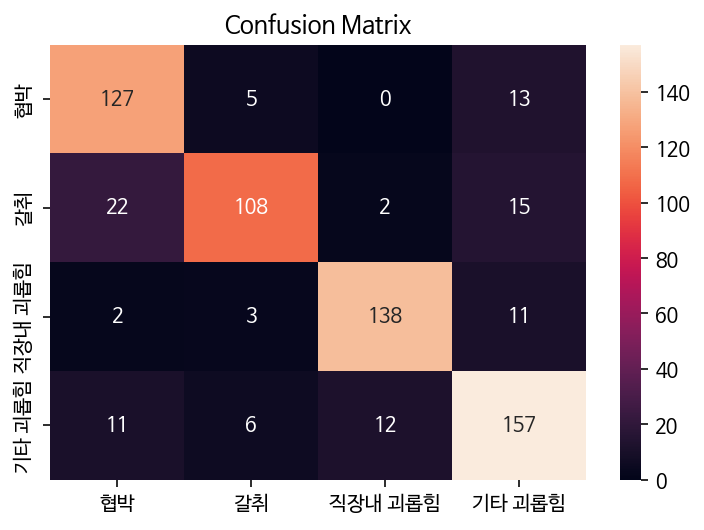

In [119]:
model.show_report(x_test, y_test)

In [89]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

x_train, x_val, y_train, y_val = train_test_split(df_emb, df['label'], test_size=0.2)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2)

In [90]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm = model_lgbm.fit(
    x_train, y_train, 
    eval_set=[(x_val, y_val)], 
    verbose=0, 
    early_stopping_rounds=25)

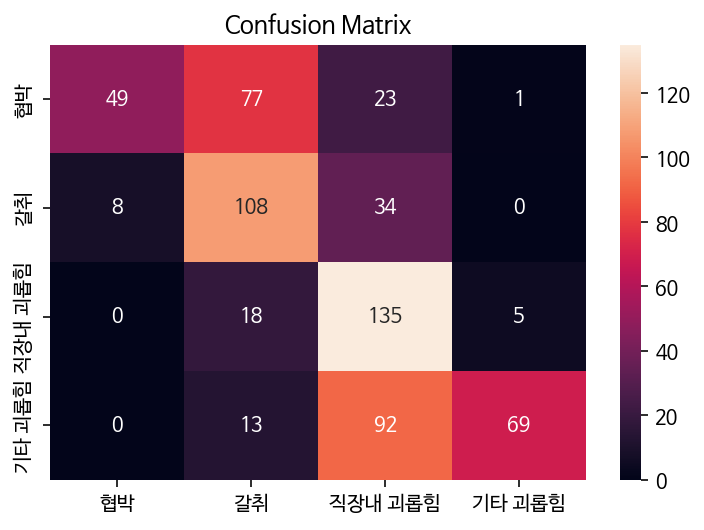

In [98]:
y_pred = np.round(lgbm.predict(x_test))

conf_matrix = confusion_matrix(y_test, y_pred)
names = ["협박", "갈취", "직장내 괴롭힘", "기타 괴롭힘"]
conf_matrix = pd.DataFrame(conf_matrix, index=names, columns=names)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

In [99]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.5712025316455697